# mor

In [1]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 9]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="mor")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="mor")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="mor")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="mor")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="mor")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="mor")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 64.0
最適なgamma: 0.5


,false,mor
false,349,4
mor,3,55


,false,mor
false,116,2
mor,1,18


正解率(Accuracy) : 訓練 0.9829683698296837, 検証 0.9781021897810219
適合率(Precision) : 訓練 0.9322033898305084, 検証 0.9
再現率(Recall) : 訓練 0.9482758620689655, 検証 0.9473684210526315
F1スコア : 訓練 0.9401709401709402, 検証 0.9230769230769231


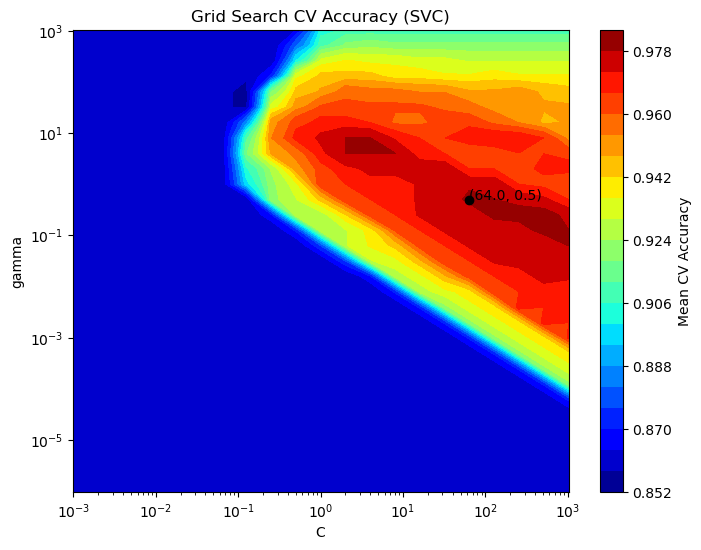

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# jbw

In [1]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 10]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="jbw")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="jbw")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="jbw")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="jbw")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="jbw")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="jbw")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 256.0
最適なgamma: 2.0


,false,jbw
false,394,0
jbw,0,17


,false,jbw
false,129,2
jbw,1,5


正解率(Accuracy) : 訓練 1.0, 検証 0.9781021897810219
適合率(Precision) : 訓練 1.0, 検証 0.7142857142857143
再現率(Recall) : 訓練 1.0, 検証 0.8333333333333334
F1スコア : 訓練 1.0, 検証 0.7692307692307693


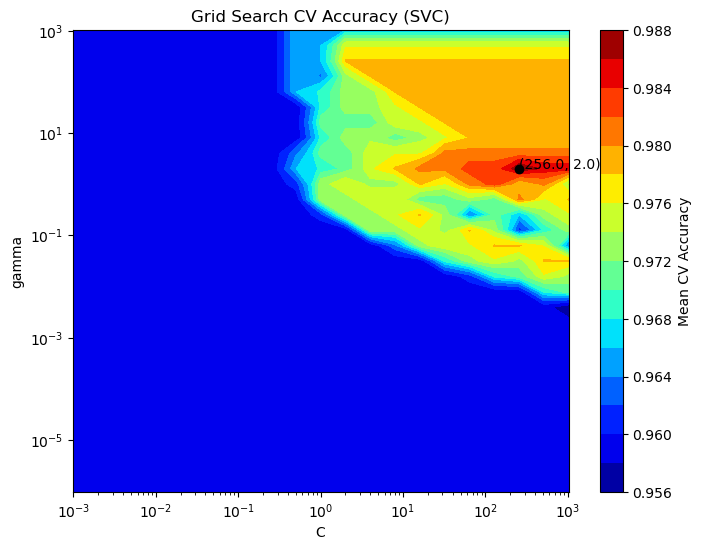

In [4]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# d6r

In [5]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 11]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d6r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d6r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d6r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d6r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d6r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d6r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 1024.0
最適なgamma: 0.25


,d6r,false
d6r,128,8
false,8,267


,d6r,false
d6r,32,14
false,8,83


正解率(Accuracy) : 訓練 0.9610705596107056, 検証 0.8394160583941606
適合率(Precision) : 訓練 0.9411764705882353, 検証 0.8
再現率(Recall) : 訓練 0.9411764705882353, 検証 0.6956521739130435
F1スコア : 訓練 0.9411764705882353, 検証 0.7441860465116279


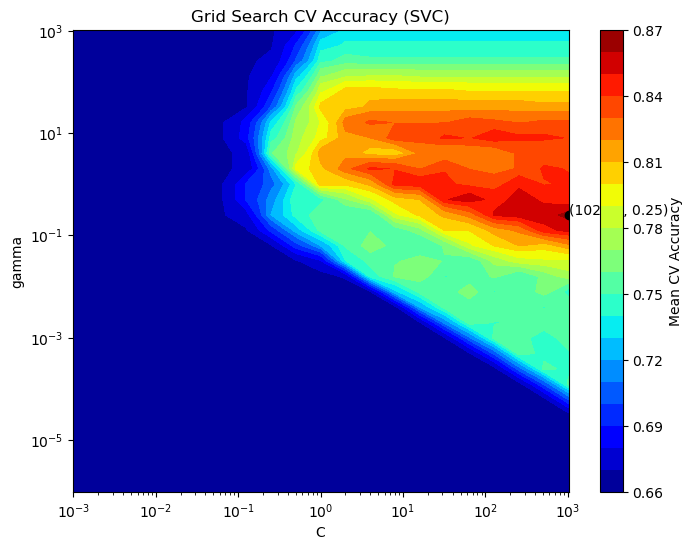

In [6]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# d8r

In [7]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 12]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="d8r")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="d8r")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="d8r")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="d8r")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="d8r")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="d8r")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 16.0
最適なgamma: 2.0


,d8r,false
d8r,45,1
false,0,365


,d8r,false
d8r,9,6
false,1,121


正解率(Accuracy) : 訓練 0.9975669099756691, 検証 0.948905109489051
適合率(Precision) : 訓練 1.0, 検証 0.9
再現率(Recall) : 訓練 0.9782608695652174, 検証 0.6
F1スコア : 訓練 0.989010989010989, 検証 0.72


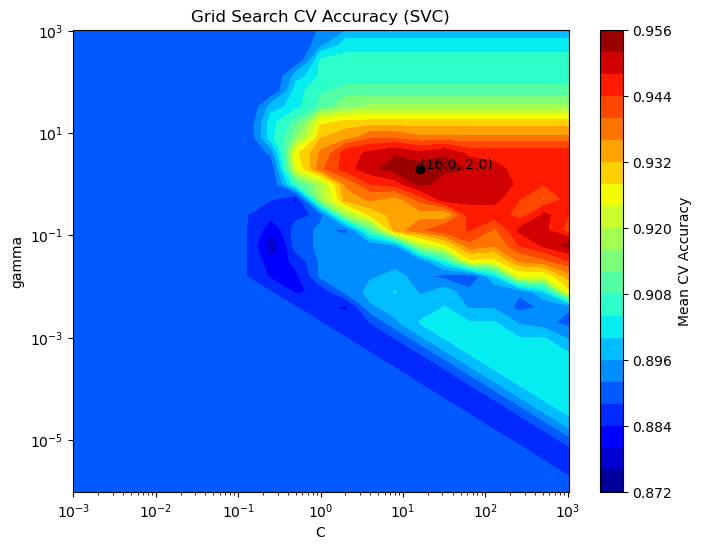

In [8]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# can

In [9]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 13]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="can")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="can")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="can")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="can")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="can")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="can")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 4.0
最適なgamma: 2.0


,can,false
can,74,9
false,3,325


,can,false
can,19,9
false,0,109


正解率(Accuracy) : 訓練 0.9708029197080292, 検証 0.9343065693430657
適合率(Precision) : 訓練 0.961038961038961, 検証 1.0
再現率(Recall) : 訓練 0.891566265060241, 検証 0.6785714285714286
F1スコア : 訓練 0.925, 検証 0.8085106382978723


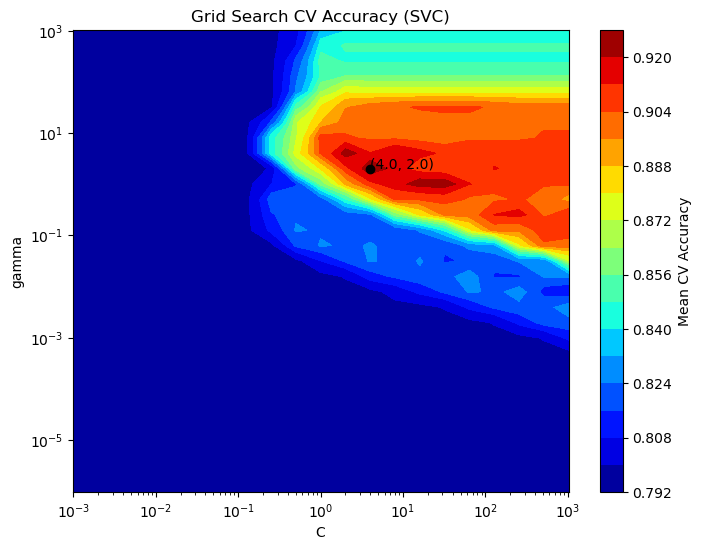

In [10]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# sod

In [11]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 14]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="sod")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="sod")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="sod")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="sod")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="sod")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="sod")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 16.0
最適なgamma: 0.25


,false,sod
false,298,0
sod,7,106


,false,sod
false,97,2
sod,4,34


正解率(Accuracy) : 訓練 0.9829683698296837, 検証 0.9562043795620438
適合率(Precision) : 訓練 1.0, 検証 0.9444444444444444
再現率(Recall) : 訓練 0.9380530973451328, 検証 0.8947368421052632
F1スコア : 訓練 0.9680365296803652, 検証 0.918918918918919


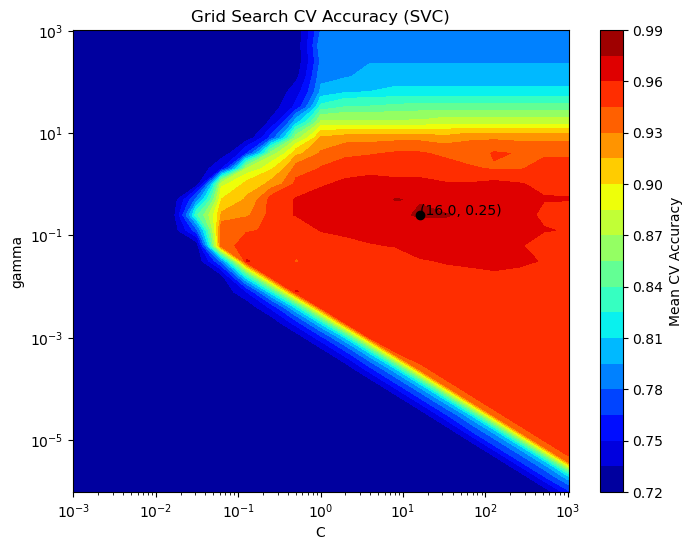

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# lta

In [13]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 15]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="lta")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="lta")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="lta")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="lta")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="lta")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="lta")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 1024.0
最適なgamma: 0.015625


,false,lta
false,347,4
lta,8,52


,false,lta
false,116,1
lta,4,16


正解率(Accuracy) : 訓練 0.9708029197080292, 検証 0.9635036496350365
適合率(Precision) : 訓練 0.9285714285714286, 検証 0.9411764705882353
再現率(Recall) : 訓練 0.8666666666666667, 検証 0.8
F1スコア : 訓練 0.896551724137931, 検証 0.8648648648648649


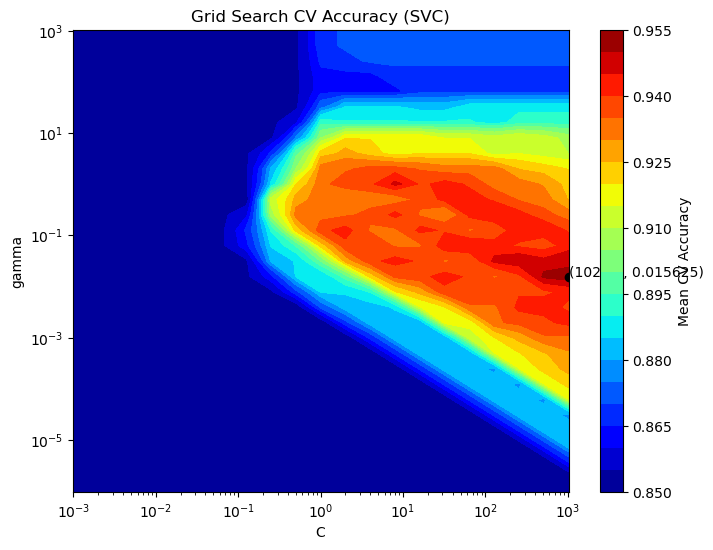

In [14]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 4

In [15]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 16]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 32.0
最適なgamma: 0.5


,4,false
4,226,10
false,14,161


,4,false
4,76,3
false,9,49


正解率(Accuracy) : 訓練 0.9416058394160584, 検証 0.9124087591240876
適合率(Precision) : 訓練 0.9416666666666667, 検証 0.8941176470588236
再現率(Recall) : 訓練 0.9576271186440678, 検証 0.9620253164556962
F1スコア : 訓練 0.9495798319327731, 検証 0.926829268292683


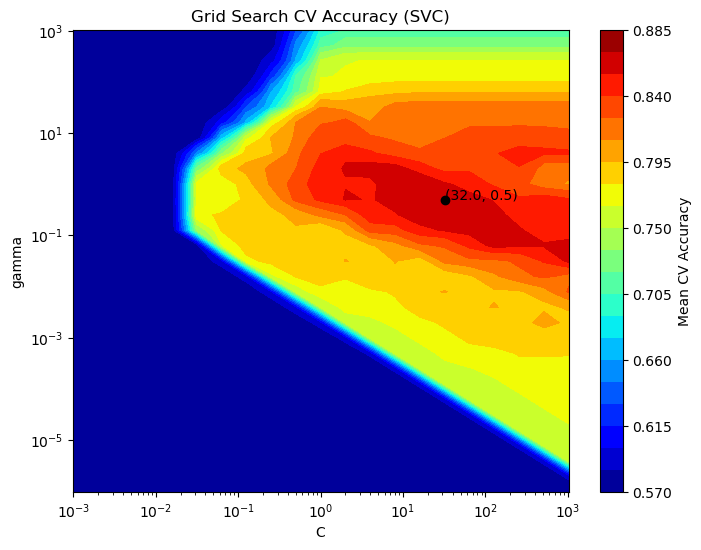

In [16]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 6

In [17]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 17]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 32.0
最適なgamma: 0.5


,6,false
6,221,9
false,20,161


,6,false
6,71,5
false,15,46


正解率(Accuracy) : 訓練 0.9294403892944039, 検証 0.8540145985401459
適合率(Precision) : 訓練 0.91701244813278, 検証 0.8255813953488372
再現率(Recall) : 訓練 0.9608695652173913, 検証 0.9342105263157895
F1スコア : 訓練 0.9384288747346072, 検証 0.8765432098765432


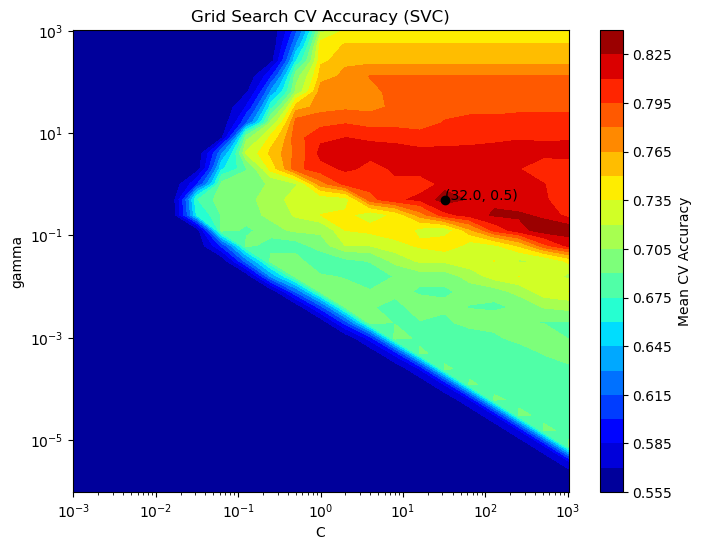

In [18]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 8

In [19]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 18]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="8")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="8")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="8")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="8")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="8")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="8")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 2.0
最適なgamma: 2.0


,8,false
8,109,22
false,1,279


,8,false
8,33,11
false,6,87


正解率(Accuracy) : 訓練 0.9440389294403893, 検証 0.8759124087591241
適合率(Precision) : 訓練 0.990909090909091, 検証 0.8461538461538461
再現率(Recall) : 訓練 0.8320610687022901, 検証 0.75
F1スコア : 訓練 0.9045643153526971, 検証 0.7951807228915663


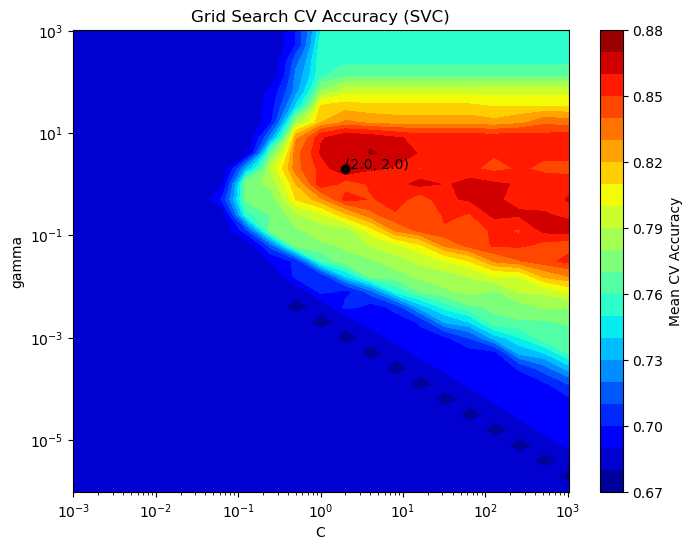

In [20]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 5-1

In [21]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 19]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="5-1")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="5-1")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="5-1")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="5-1")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="5-1")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="5-1")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 1024.0
最適なgamma: 0.25


,5-1,false
5-1,61,2
false,2,346


,5-1,false
5-1,19,2
false,3,113


正解率(Accuracy) : 訓練 0.9902676399026764, 検証 0.9635036496350365
適合率(Precision) : 訓練 0.9682539682539683, 検証 0.8636363636363636
再現率(Recall) : 訓練 0.9682539682539683, 検証 0.9047619047619048
F1スコア : 訓練 0.9682539682539683, 検証 0.8837209302325582


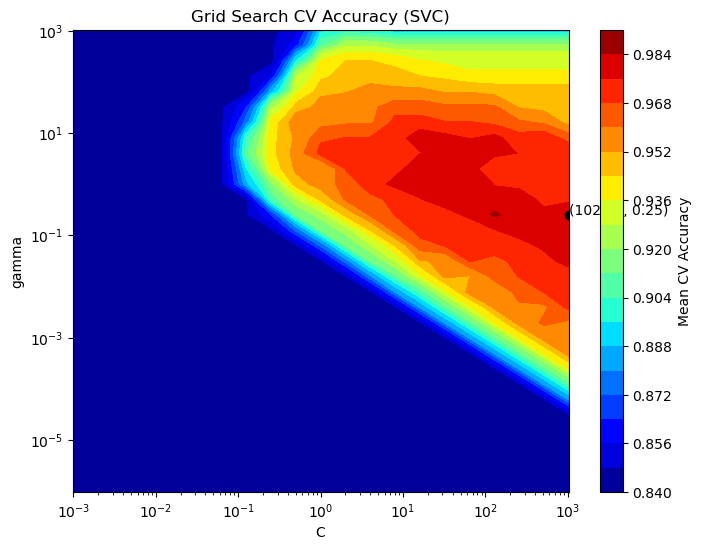

In [22]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 4-2

In [23]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 20]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="4-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="4-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="4-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="4-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="4-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="4-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 1024.0
最適なgamma: 0.25


,4-2,false
4-2,128,8
false,8,267


,4-2,false
4-2,32,14
false,8,83


正解率(Accuracy) : 訓練 0.9610705596107056, 検証 0.8394160583941606
適合率(Precision) : 訓練 0.9411764705882353, 検証 0.8
再現率(Recall) : 訓練 0.9411764705882353, 検証 0.6956521739130435
F1スコア : 訓練 0.9411764705882353, 検証 0.7441860465116279


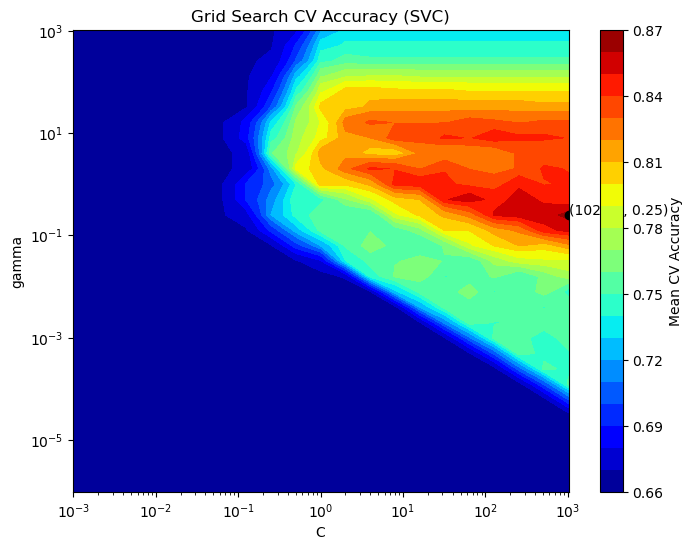

In [24]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')

# 6-2

In [25]:
import pandas as pd
from IPython.display import display
dataset=pd.read_csv('zeolite_CBU_Amorphous.csv', index_col=0, header=0)
x=pd.concat([dataset.iloc[:, 0:5], dataset.iloc[:, 6:8]], axis=1)
y=dataset.iloc[:, 21]
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test=train_test_split(x, y, test_size=0.25, shuffle=True, stratify=y, random_state=3)
autoscaled_x_train = (x_train - x_train.mean()) / x_train.std()
autoscaled_x_test = (x_test - x_train.mean()) / x_train.std()
from sklearn.svm import SVC
import numpy as np
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import GridSearchCV
fold = StratifiedKFold(n_splits = 10, shuffle=True, random_state=3)
nonlinear_svm_cs = 2 ** np.arange(-10, 11, 1.0)
nonlinear_svm_gammas = 2 ** np.arange(-20, 11, 1.0)
model_for_cross_varidation = SVC(kernel='rbf')
gs_cv = GridSearchCV(model_for_cross_varidation, {'C':nonlinear_svm_cs, 'gamma':nonlinear_svm_gammas}, cv=fold)
gs_cv.fit(autoscaled_x_train, y_train)
optimal_nonlinear_svm_c = gs_cv.best_params_['C'] 
optimal_nonlinear_svm_gamma = gs_cv.best_params_['gamma']
print(f"最適なC: {optimal_nonlinear_svm_c}")
print(f"最適なgamma: {optimal_nonlinear_svm_gamma}")
model = SVC(kernel='rbf', C=optimal_nonlinear_svm_c, gamma=optimal_nonlinear_svm_gamma)
model.fit(autoscaled_x_train, y_train)

CBU=list(set(y))
CBU.sort()
estimated_y_train=pd.DataFrame(model.predict(autoscaled_x_train))
estimated_y_test=pd.DataFrame(model.predict(autoscaled_x_test))

from sklearn import metrics
confusion_matrix_train=pd.DataFrame(metrics.confusion_matrix(y_train, estimated_y_train), index=CBU, columns=CBU)
accuracy_train=metrics.accuracy_score(y_train, estimated_y_train)
precision_train = metrics.precision_score(y_train, estimated_y_train, pos_label="6-2")
recall_train = metrics.recall_score(y_train, estimated_y_train, pos_label="6-2")
f1_train = metrics.f1_score(y_train, estimated_y_train, pos_label="6-2")
display(confusion_matrix_train)

confusion_matrix_test=pd.DataFrame(metrics.confusion_matrix(y_test, estimated_y_test), index=CBU, columns=CBU)
accuracy_test=metrics.accuracy_score(y_test, estimated_y_test)
precision_test = metrics.precision_score(y_test, estimated_y_test, pos_label="6-2")
recall_test = metrics.recall_score(y_test, estimated_y_test, pos_label="6-2")
f1_test = metrics.f1_score(y_test, estimated_y_test, pos_label="6-2")
display(confusion_matrix_test)

print(f"正解率(Accuracy) : 訓練 {accuracy_train}, 検証 {accuracy_test}")
print(f"適合率(Precision) : 訓練 {precision_train}, 検証 {precision_test}")
print(f"再現率(Recall) : 訓練 {recall_train}, 検証 {recall_test}")
print(f"F1スコア : 訓練 {f1_train}, 検証 {f1_test}")

最適なC: 1024.0
最適なgamma: 0.125


,6-2,false
6-2,93,22
false,5,291


,6-2,false
6-2,29,10
false,3,95


正解率(Accuracy) : 訓練 0.9343065693430657, 検証 0.9051094890510949
適合率(Precision) : 訓練 0.9489795918367347, 検証 0.90625
再現率(Recall) : 訓練 0.808695652173913, 検証 0.7435897435897436
F1スコア : 訓練 0.8732394366197183, 検証 0.8169014084507042


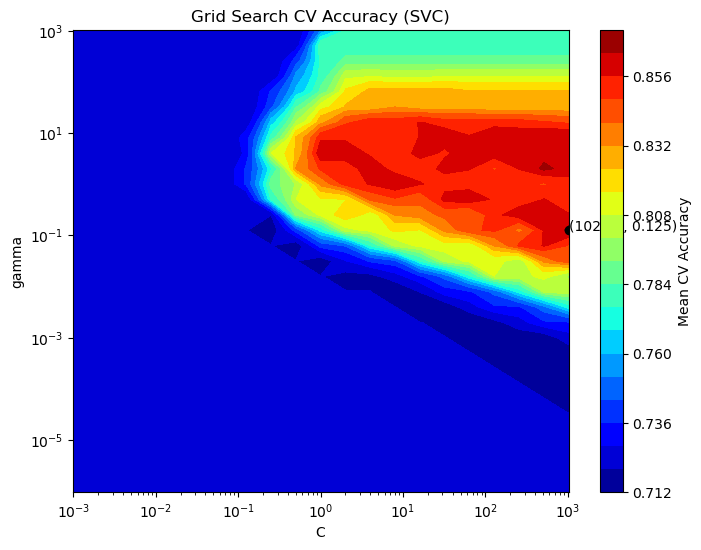

In [26]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

# グリッドサーチの結果をDataFrameに変換
results = pd.DataFrame(gs_cv.cv_results_)

# パラメータのリストを取得
param_c = results['param_C'].astype(float)
param_gamma = results['param_gamma'].astype(float)
scores = results['mean_test_score'].values

# グリッドを作成
C_values = sorted(np.unique(param_c))
gamma_values = sorted(np.unique(param_gamma))
score_matrix = np.zeros((len(gamma_values), len(C_values)))

# スコアをマトリクスに詰める
for i, g in enumerate(gamma_values):
    for j, c in enumerate(C_values):
        match = (param_c == c) & (param_gamma == g)
        if match.any():
            score_matrix[i, j] = scores[match][0]

# 等高線図を作成
plt.figure(figsize=(8, 6))
contour = plt.contourf(C_values, gamma_values, score_matrix, levels=20, cmap='jet')
plt.colorbar(contour, label='Mean CV Accuracy')
plt.xlabel('C')
plt.ylabel('gamma')
plt.title('Grid Search CV Accuracy (SVC)')

# ベスト点に印をつける
best_c = gs_cv.best_params_['C']
best_gamma = gs_cv.best_params_['gamma']
plt.scatter(best_c, best_gamma, marker='o',color='black' )
plt.text(best_c, best_gamma, f'({best_c}, {best_gamma})', color='black')

plt.xscale('log')
plt.yscale('log')